<a href="https://colab.research.google.com/github/ddlandim/monografy-ann-demand-prediction/blob/master/case1__ModelsTests_DriverCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
prefix = 'case1_'
path = 'https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/'
sufix = '?raw=true'

# **BIBLIOTECAS**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
plt.style.use('ggplot')
# PROCESSAMENTO
from sklearn.preprocessing import *
from sklearn.metrics import *
# MODELOS
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

import seaborn as sns
import scipy
from scipy import stats

# EXPORTAÇÃO / IMPORTAÇÃO
# Lib para exportar scalers
# https://scikit-learn.org/stable/modules/model_persistence.html
from joblib import dump, load

# Lib para exportar numpy ou arrays
# https://www.christopherlovell.co.uk/blog/2016/04/27/h5py-intro.html
import h5py

# IMPORTAÇÃO DOS DADOS

## Teste de indexação e inclusão de features em um dataframe com as métricas das avaliações.

In [ ]:
df_models_metrics = pd.DataFrame(columns=['MODELO','TOTAL_CONSUMIDAS','TOTAL_PREVISTAS','ERRO_TOTAL_PREVISAO','ERRO_TOTAL_PERC_PREVISAO', 'CORRELACAO', 'p-value', 'slope', 'intercept', 'r2_value', 'std_err','RMSE', 'TOTAL_FALTA', 'TOTAL_DESCARTE', 'ERRO_ABS_MEDIANO' , 'ERRO_ABSOLUTO_PERCENTUAL_MEDIO'])
df_models_metrics

,MODELO,TOTAL_CONSUMIDAS,TOTAL_PREVISTAS,ERRO_TOTAL_PREVISAO,ERRO_TOTAL_PERC_PREVISAO,CORRELACAO,p-value,slope,intercept,r2_value,std_err,RMSE,TOTAL_FALTA,TOTAL_DESCARTE,ERRO_ABS_MEDIANO,ERRO_ABSOLUTO_PERCENTUAL_MEDIO


In [ ]:
df_models_metrics = df_models_metrics.set_index('MODELO')
df_models_metrics

,TOTAL_CONSUMIDAS,TOTAL_PREVISTAS,ERRO_TOTAL_PREVISAO,ERRO_TOTAL_PERC_PREVISAO,CORRELACAO,p-value,slope,intercept,r2_value,std_err,RMSE,TOTAL_FALTA,TOTAL_DESCARTE,ERRO_ABS_MEDIANO,ERRO_ABSOLUTO_PERCENTUAL_MEDIO
MODELO,,,,,,,,,,,,,,,


## **case1_** CONJUNTO DE TESTE = 2019-01-01 À 2019-07-31

In [ ]:
df_test = pd.read_pickle("https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case1_df_test.pkl?raw=true")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 88 entries, 2019-02-20 to 2019-07-05
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEMESTRE_1                88 non-null     int64  
 1   SEMESTRE_2                88 non-null     int64  
 2   SEGUNDA                   88 non-null     int64  
 3   TERCA                     88 non-null     int64  
 4   QUARTA                    88 non-null     int64  
 5   QUINTA                    88 non-null     int64  
 6   SEXTA                     88 non-null     int64  
 7   DISTANCIA_DIA_ANTERIOR    88 non-null     int64  
 8   DISTANCIA_DIA_POSTERIOR   88 non-null     int64  
 9   PERC_CONCLUSAO_SEM        88 non-null     float64
 10  PERC_CONCLUSAO_MES        88 non-null     float64
 11  PRESSAO_ATMOSFERICA       88 non-null     float64
 12  TEMPERATURA               88 non-null     float64
 13  UMIDADE                   88 non-null     int64

In [ ]:
df_test.head()

,SEMESTRE_1,SEMESTRE_2,SEGUNDA,TERCA,QUARTA,QUINTA,SEXTA,DISTANCIA_DIA_ANTERIOR,DISTANCIA_DIA_POSTERIOR,PERC_CONCLUSAO_SEM,PERC_CONCLUSAO_MES,PRESSAO_ATMOSFERICA,TEMPERATURA,UMIDADE,VENTO,VENDAS_ALMOCO,VENDAS_ALMOCO_1,VENDAS_ALMOCO_2,VENDAS_ALMOCO_3,VENDAS_ALMOCO_4,VENDAS_ALMOCO_5,ENTR_ALMOCO,ENTR_ALMOCO_1,ENTR_ALMOCO_2,ENTR_ALMOCO_3,ENTR_ALMOCO_4,ENTR_ALMOCO_5,ENTR_JANTAR,ENTR_JANTAR_1,ENTR_JANTAR_2,ENTR_JANTAR_3,ENTR_JANTAR_4,ENTR_JANTAR_5,RU_ALMOCO_PRED,RU_JANTAR_PRED,pred_RNN_ENDO_1_NEW_test,pred_RNN_ENDO_1_test,model_rnn_unique_1,pred_RNN_ENDO_2_test,pred_MLP_ENDO_1_test,pred_RNN_EXO_1_test,pred_RNN_EXO_2_test,pred_RNN_EXO_3_test
DATA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-02-20,1,0,0,0,1,0,0,61,1,0.73,71.43,947.9,23.7,78,0.5,966,10,40,58,95,111,441,14,35,44,88,77,246,0,17,14,27,50,100,65,75.288422,85.317772,85.317772,98.984299,145.950943,182.250366,387.503998,345.411926
2019-02-21,1,0,0,0,0,1,0,1,1,1.46,75.00,949.8,22.9,84,1.5,779,966,10,40,58,95,458,441,14,35,44,88,279,246,0,17,14,27,114,35,523.388794,202.882233,202.882233,474.870453,586.287476,243.321457,388.437286,238.454773
2019-02-22,1,0,0,0,0,0,1,1,3,2.19,78.57,951.6,25.5,77,2.7,314,779,966,10,40,58,275,458,441,14,35,44,61,279,246,0,17,14,57,18,398.292175,289.051147,289.051147,363.845734,420.163635,280.444153,348.338806,283.864624
2019-02-25,1,0,1,0,0,0,0,3,1,4.38,89.29,946.4,27.6,71,0.6,807,314,779,966,10,40,455,275,458,441,14,35,196,61,279,246,0,17,45,22,329.883972,292.395569,292.395569,296.073853,342.848694,220.567719,226.436798,311.131470
2019-02-26,1,0,0,1,0,0,0,1,1,5.11,92.86,949.8,21.4,87,1.6,615,807,314,779,966,10,401,455,275,458,441,14,233,196,61,279,246,0,18,0,365.316162,328.533295,328.533295,426.545074,507.593719,286.661072,258.375458,318.834534


In [ ]:
df_test.tail()

,SEMESTRE_1,SEMESTRE_2,SEGUNDA,TERCA,QUARTA,QUINTA,SEXTA,DISTANCIA_DIA_ANTERIOR,DISTANCIA_DIA_POSTERIOR,PERC_CONCLUSAO_SEM,PERC_CONCLUSAO_MES,PRESSAO_ATMOSFERICA,TEMPERATURA,UMIDADE,VENTO,VENDAS_ALMOCO,VENDAS_ALMOCO_1,VENDAS_ALMOCO_2,VENDAS_ALMOCO_3,VENDAS_ALMOCO_4,VENDAS_ALMOCO_5,ENTR_ALMOCO,ENTR_ALMOCO_1,ENTR_ALMOCO_2,ENTR_ALMOCO_3,ENTR_ALMOCO_4,ENTR_ALMOCO_5,ENTR_JANTAR,ENTR_JANTAR_1,ENTR_JANTAR_2,ENTR_JANTAR_3,ENTR_JANTAR_4,ENTR_JANTAR_5,RU_ALMOCO_PRED,RU_JANTAR_PRED,pred_RNN_ENDO_1_NEW_test,pred_RNN_ENDO_1_test,model_rnn_unique_1,pred_RNN_ENDO_2_test,pred_MLP_ENDO_1_test,pred_RNN_EXO_1_test,pred_RNN_EXO_2_test,pred_RNN_EXO_3_test
DATA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-01,1,0,1,0,0,0,0,3,1,96.35,3.23,952.2,18.8,74,0.6,80,111,376,348,442,632,94,196,259,266,438,385,23,20,120,129,146,157,500,204,218.881180,261.537384,261.537384,197.936646,233.810928,223.693253,230.292511,341.280792
2019-07-02,1,0,0,1,0,0,0,1,1,97.08,6.45,947.6,17.3,78,1.0,113,80,111,376,348,442,116,94,196,259,266,438,35,23,20,120,129,146,569,189,196.031769,224.775909,224.775909,194.300781,125.703171,208.172302,178.844284,313.745209
2019-07-03,1,0,0,0,1,0,0,1,1,97.81,9.68,946.0,16.9,82,0.5,62,113,80,111,376,348,80,116,94,196,259,266,43,35,23,20,120,129,345,167,187.817642,172.214081,172.214081,151.184082,137.527145,190.134674,156.752350,295.456299
2019-07-04,1,0,0,0,0,1,0,1,1,98.54,12.90,948.3,18.4,92,0.7,60,62,113,80,111,376,65,80,116,94,196,259,7,43,35,23,20,120,336,156,142.221603,144.611160,144.611160,54.052692,37.999619,203.045837,174.423935,277.832916
2019-07-05,1,0,0,0,0,0,1,1,31,99.27,16.13,949.5,15.6,94,3.0,19,60,62,113,80,111,26,65,80,116,94,196,4,7,43,35,23,20,254,26,139.805481,122.705025,122.705025,73.138626,94.952332,171.668396,18.642702,225.450211


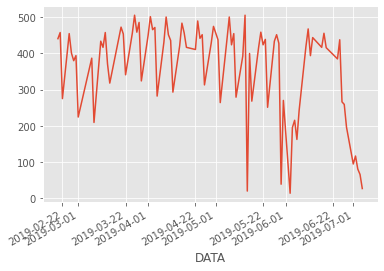

In [ ]:
df_test['ENTR_ALMOCO'].plot()

## NP ARRAYS ESCALADOS E FORMATADOS PARA ENTRADA DOS MODELOS

In [ ]:
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case1_np_data.h5?raw=true

--2020-10-04 04:24:38--  https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case1_np_data.h5?raw=true
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case1_np_data.h5 [following]
--2020-10-04 04:24:38--  https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case1_np_data.h5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case1_np_data.h5 [following]
--2020-10-04 04:24:38--  https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case1_np_data.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.1

In [ ]:
hf = h5py.File('./case1_np_data.h5?raw=true', 'r')
hf.keys()

<KeysViewHDF5 ['scaled_test_x', 'scaled_test_y', 'scaled_train_x', 'scaled_train_y', 'scaled_val_x', 'scaled_val_y', 'test_x_dense', 'train_x_dense', 'val_x_dense']>

In [ ]:
# Dados Recorrentes(temporais), escalados
scaled_recurrent_train_x = np.array(hf.get('scaled_train_x'))
scaled_recurrent_val_x = np.array(hf.get('scaled_val_x'))
scaled_recurrent_test_x = np.array(hf.get('scaled_test_x'))

# Dados Categóricos (dias da semana e semestre já escalados no df original)
# concatenados com Dados Pontuais (climáticos) escalados
scaled_discrete_train_x = np.array(hf.get('train_x_dense'))
scaled_discrete_val_x = np.array(hf.get('val_x_dense'))
scaled_discrete_test_x = np.array(hf.get('test_x_dense'))

# Valores de supervisão (saída) de cada dataframe, escalados
scaled_train_y = np.array(hf.get('scaled_train_y'))
scaled_val_y = np.array(hf.get('scaled_val_y'))
scaled_test_y = np.array(hf.get('scaled_test_y'))

In [ ]:
hf.close()

## Importando Scalers para transformar a saída em valores reais.

In [ ]:
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case1_scaler_numpont.joblib?raw=true

--2020-10-04 04:24:39--  https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case1_scaler_numpont.joblib?raw=true
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case1_scaler_numpont.joblib [following]
--2020-10-04 04:24:39--  https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case1_scaler_numpont.joblib
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case1_scaler_numpont.joblib [following]
--2020-10-04 04:24:40--  https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case1_scaler_numpont.joblib
Resolving raw.githubusercontent.com (raw.githubuserc

In [ ]:
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case1_rnn_scalers_arr.joblib?raw=true

--2020-10-04 04:24:40--  https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case1_rnn_scalers_arr.joblib?raw=true
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case1_rnn_scalers_arr.joblib [following]
--2020-10-04 04:24:41--  https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case1_rnn_scalers_arr.joblib
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case1_rnn_scalers_arr.joblib [following]
--2020-10-04 04:24:41--  https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case1_rnn_scalers_arr.joblib
Resolving raw.githubusercontent.com (raw.github

In [ ]:
num_temporais = 3 #ENTR_ALMOCO, VENDAS_ALMOCO, ENTR_JANTAR
discrete_scaler = MinMaxScaler([0,1])
discrete_scaler = load('./case1_scaler_numpont.joblib?raw=true')

recurrent_scalers = [MinMaxScaler([0,1]) for i in range(num_temporais)]
recurrent_scalers = load('./case1_rnn_scalers_arr.joblib?raw=true')

# **FUNÇÕES DE AVALIAÇÃO DOS MODELOS**

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
  y_true = np.maximum(y_true, 1e-7)  # Prevent division by zero
  return 100. * np.mean(np.abs((y_true - y_pred) / y_true))

def metricas_predicoes(_df_true, _true_string , _pred_string , datetime_index_begin_string, datetime_index_end_string, _df_models_metrics):
  m_df_models_metrics = pd.DataFrame()
  m_df_models_metrics = _df_models_metrics
  df = pd.DataFrame()
  df = _df_true

  arr_true = df[_true_string][ datetime_index_begin_string : datetime_index_end_string ]
  sum_true = np.sum(arr_true)
  len_true = len(arr_true)

  arr_pred = df[_pred_string][ datetime_index_begin_string : datetime_index_end_string ]
  sum_pred = np.sum(arr_pred)
  len_pred = len(arr_pred)

  diff_pred = sum_pred - sum_true
  perc_diff_pred = (diff_pred / max(1e-7,sum_true)) * 100

  arr_e = arr_true - arr_pred

  print("TOTAL DE REFEIÇÕES CONSUMIDAS = " + str(sum_true) + " : " + str(len_true) + " linhas")
  print("TOTAL DE REFEIÇÕES PROJETADAS = " + str(sum_pred) + " : " + str(len_pred) + " linhas")
  print("ERRO DE PREVISÃO = " + str(diff_pred) + " " + str(perc_diff_pred) + " % do total consumido")

  #correlação e p-value
  m_r, m_p = scipy.stats.pearsonr(arr_true, arr_pred)
  #desvio padrao, r2 e outras estatisticas
  slope, intercept, r_value, p_value, std_err = stats.linregress(arr_true, arr_pred)
  #tranformando r pra r2
  r_value = r_value**2
  print("CORRELAÇÃO (r): " + str(m_r) + " Pi (p) :" + str(p_value) + " R2 :" + str(r_value))
  
  #plotando gráfico scatter
  sns.regplot(x=arr_true,y=arr_pred,data=df)

  rmse = mean_squared_error(arr_true, arr_pred, squared=False)
  print("RMSE = " + str(rmse))

  m_mae = np.median(np.abs(arr_e))
  m_mape = mean_absolute_percentage_error(arr_true,arr_pred)

  subpredictions = sum(i for i in arr_e if i < 0)
  superpredictions = sum(i for i in arr_e if i >= 0)

  print("ERRO TOTAL DE REFEIÇÕES SUB PROJETADAS = " + str(subpredictions))
  print("ERRO TOTAL DE REFEIÇÕES SUPER PROJETADAS = " + str(superpredictions))
  print("ERRO ABSOLUTO MEDIANO = " + str(m_mae))
  print("ERRO ABSOLUTO PERCENTUAL MEDIO = " + str(m_mape)+"%")
  plt.figure(figsize=(30,5))
  
  
  df[_true_string][ datetime_index_begin_string : datetime_index_end_string ].plot( linewidth=1.5, color='red', label = _true_string)
  df[_pred_string][ datetime_index_begin_string : datetime_index_end_string ].plot( linewidth=2.5, color='blue', label = _pred_string)
  plt.legend()
  plt.xlabel("Index", labelpad=20)
  plt.show()

  m_name = _pred_string + "_" + datetime_index_begin_string + ":" + datetime_index_end_string
  new_row = pd.Series(data={ 'TOTAL_CONSUMIDAS':sum_true, 
          'TOTAL_PREVISTAS':sum_pred, 
          'ERRO_TOTAL_PREVISAO':diff_pred,
          'ERRO_TOTAL_PERC_PREVISAO':perc_diff_pred,
          'CORRELACAO':m_r,'p-value':p_value, 'slope':slope, 'intercept':intercept, 'r2_value':r_value, 'std_err' : std_err,
          'RMSE':rmse, 
          'TOTAL_FALTA':subpredictions, 
          'TOTAL_DESCARTE':superpredictions, 
          'ERRO_ABS_MEDIANO':m_mae, 
          'ERRO_ABSOLUTO_PERCENTUAL_MEDIO':m_mape}, 
          name = m_name)
  m_df_models_metrics = m_df_models_metrics.append(new_row, ignore_index=False)
  return m_df_models_metrics

# **PREVISÕES**

## IMPORTAÇÃO DOS MODELOS ENDÓGENOS

In [ ]:
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case1_MLP_ENDO_1_validated.h5?raw=true
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case1_RNN_ENDO_1_validated.h5?raw=true
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case1_RNN_ENDO_1_NEW_validated.h5?raw=true
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case1_RNN_ENDO_2_validated.h5?raw=true

--2020-10-04 04:24:41--  https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case1_MLP_ENDO_1_validated.h5?raw=true
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case1_MLP_ENDO_1_validated.h5 [following]
--2020-10-04 04:24:42--  https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case1_MLP_ENDO_1_validated.h5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case1_MLP_ENDO_1_validated.h5 [following]
--2020-10-04 04:24:42--  https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case1_MLP_ENDO_1_validated.h5
Resolving raw.githubusercontent.com (raw.g

case1_MLP_ENDO_1_validated.h5

case1_RNN_ENDO_1_validated.h5

case1_RNN_ENDO_1_NEW_validated.h5

case1_RNN_ENDO_2_validated.h5

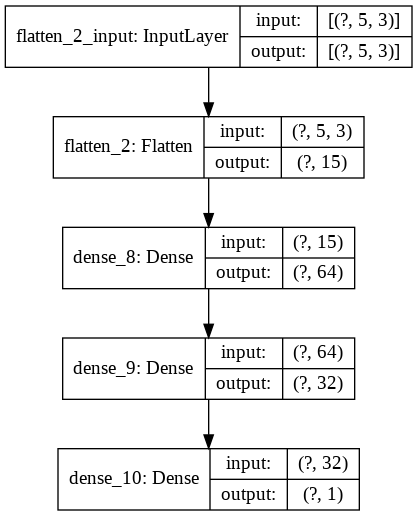

In [ ]:
MLP_ENDO_1 = keras.models.Sequential()
MLP_ENDO_1 = keras.models.load_model('/content/case1_MLP_ENDO_1_validated.h5?raw=true')
keras.utils.plot_model(MLP_ENDO_1, show_shapes=True)

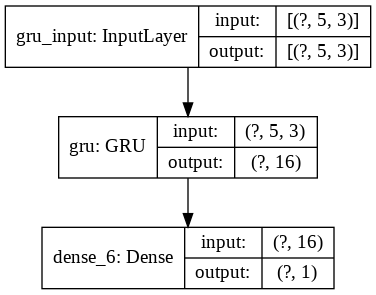

In [ ]:
RNN_ENDO_1 = keras.models.Sequential()
RNN_ENDO_1 = keras.models.load_model('/content/case1_RNN_ENDO_1_validated.h5?raw=true')
keras.utils.plot_model(RNN_ENDO_1, show_shapes=True)

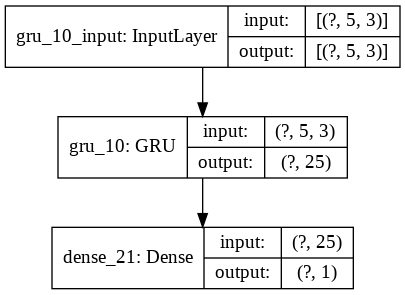

In [ ]:
RNN_ENDO_1_NEW = keras.models.Sequential()
RNN_ENDO_1_NEW = keras.models.load_model('/content/case1_RNN_ENDO_1_NEW_validated.h5?raw=true')
keras.utils.plot_model(RNN_ENDO_1_NEW, show_shapes=True)

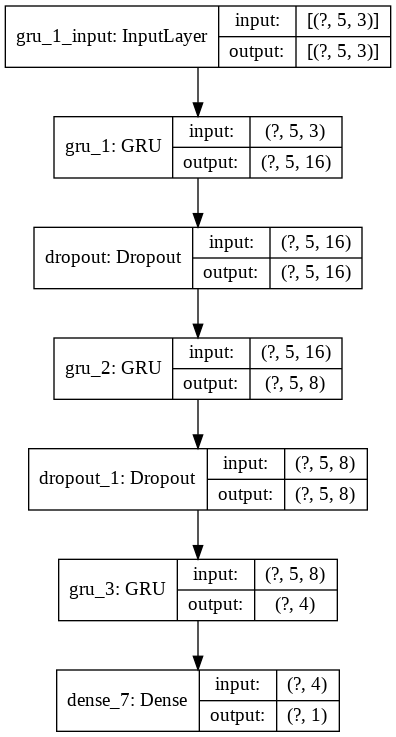

In [ ]:
RNN_ENDO_2 = keras.models.Sequential()
RNN_ENDO_2 = keras.models.load_model('/content/case1_RNN_ENDO_2_validated.h5?raw=true')
keras.utils.plot_model(RNN_ENDO_2, show_shapes=True)

### TESTES

#### RNN_ENDO_1

TOTAL DE REFEIÇÕES CONSUMIDAS = 31962 : 88 linhas
TOTAL DE REFEIÇÕES PROJETADAS = 30926.62 : 88 linhas
ERRO DE PREVISÃO = -1035.380859375 -3.239411987281772 % do total consumido
CORRELAÇÃO (r): 0.4772742310298987 Pi (p) :2.5815275545622973e-06 R2 :0.22779069160518126
RMSE = 115.59257225321687
ERRO TOTAL DE REFEIÇÕES SUB PROJETADAS = -3280.538887023926
ERRO TOTAL DE REFEIÇÕES SUPER PROJETADAS = 4315.918830871582
ERRO ABSOLUTO MEDIANO = 74.01921081542969
ERRO ABSOLUTO PERCENTUAL MEDIO = 87.49876134459036%


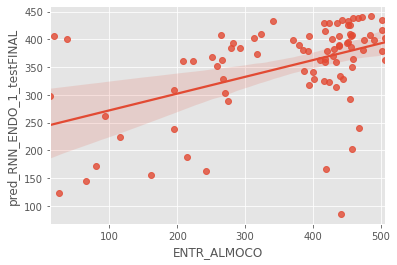

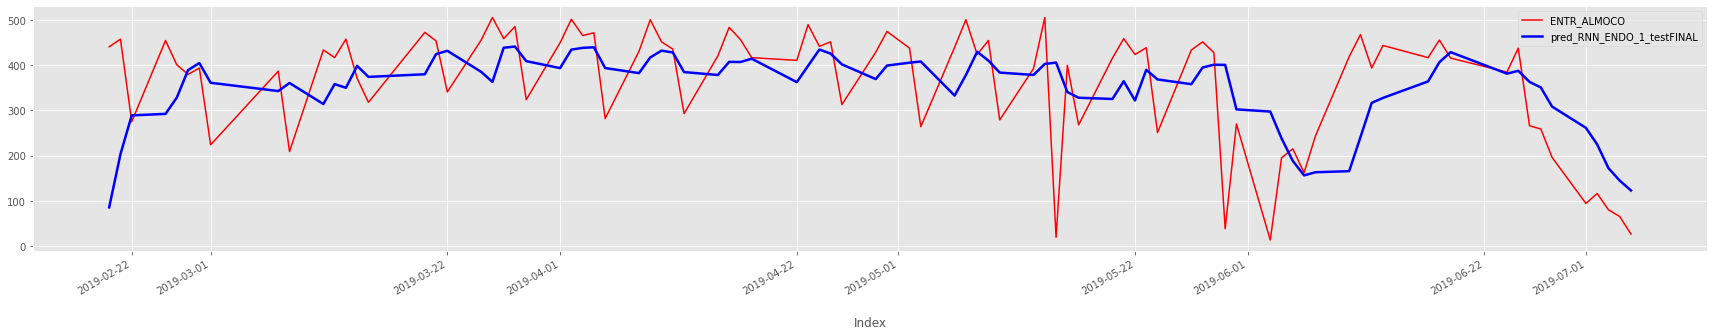

In [ ]:
#RNN_ENDO_1
model_name = 'RNN_ENDO_1'
model = RNN_ENDO_1
x_test = scaled_recurrent_test_x
pred_y = model.predict(x_test)
# retorna os valores a escala normal do problema
pred_y = recurrent_scalers[0].inverse_transform(pred_y) # 0 = ENTR_ALMOCO

#def metricas_predicoes(_df_true, _true_string , _pred_string , datetime_index_begin_string, datetime_index_end_string, _df_models_metrics):
_true_string = 'ENTR_ALMOCO'
_pred_string = 'pred_' + model_name + '_testFINAL'
df_test[_pred_string] = pred_y

datetime_index_begin_string = '2019-01-01'
datetime_index_end_string = '2019-07-31'

df_models_metrics = metricas_predicoes(df_test,_true_string,_pred_string,datetime_index_begin_string,datetime_index_end_string,df_models_metrics)

#### RNN_ENDO_1_NEW

TOTAL DE REFEIÇÕES CONSUMIDAS = 31962 : 88 linhas
TOTAL DE REFEIÇÕES PROJETADAS = 32340.148 : 88 linhas
ERRO DE PREVISÃO = 378.1484375 1.1831188207871848 % do total consumido
CORRELAÇÃO (r): 0.5453469134009845 Pi (p) :3.9277145673633965e-08 R2 :0.29740325595598105
RMSE = 114.92985962367308
ERRO TOTAL DE REFEIÇÕES SUB PROJETADAS = -3790.240951538086
ERRO TOTAL DE REFEIÇÕES SUPER PROJETADAS = 3412.095115661621
ERRO ABSOLUTO MEDIANO = 61.992218017578125
ERRO ABSOLUTO PERCENTUAL MEDIO = 84.5510973355406%


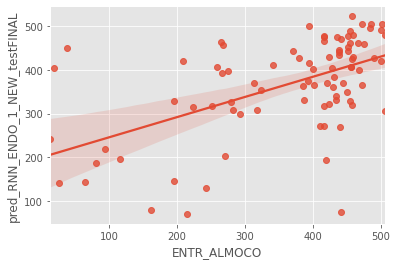

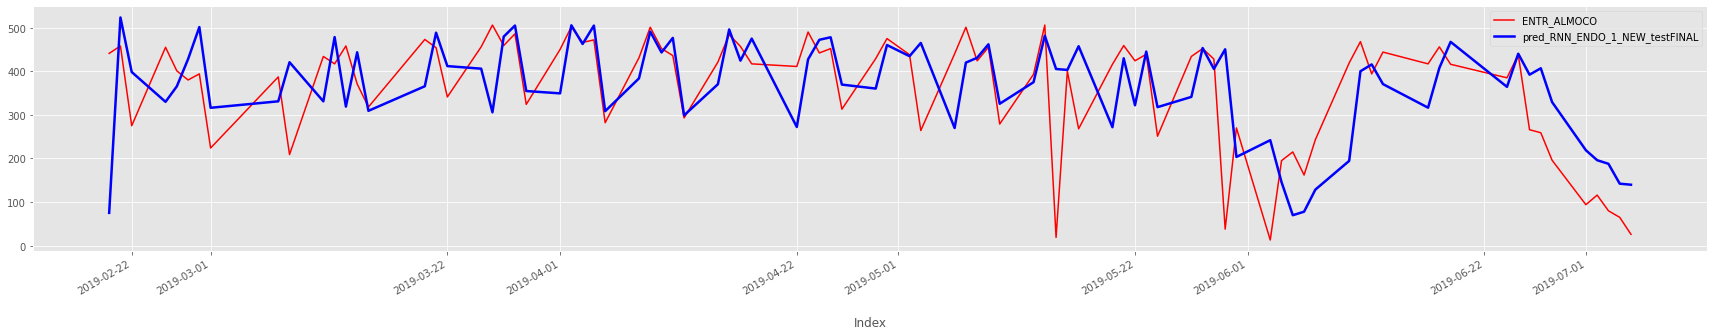

In [ ]:
#RNN_ENDO_1_NEW
model_name = 'RNN_ENDO_1_NEW'
model = RNN_ENDO_1_NEW
x_test = scaled_recurrent_test_x
pred_y = model.predict(x_test)
# retorna os valores a escala normal do problema
pred_y = recurrent_scalers[0].inverse_transform(pred_y) # 0 = ENTR_ALMOCO

_true_string = 'ENTR_ALMOCO'
_pred_string = 'pred_' + model_name + '_testFINAL'
df_test[_pred_string] = pred_y

datetime_index_begin_string = '2019-01-01'
datetime_index_end_string = '2019-07-31'

df_models_metrics = metricas_predicoes(df_test,_true_string,_pred_string,datetime_index_begin_string,datetime_index_end_string,df_models_metrics)

#### RNN_ENDO_2

TOTAL DE REFEIÇÕES CONSUMIDAS = 31962 : 88 linhas
TOTAL DE REFEIÇÕES PROJETADAS = 31465.61 : 88 linhas
ERRO DE PREVISÃO = -496.390625 -1.5530649677742319 % do total consumido
CORRELAÇÃO (r): 0.595439952619013 Pi (p) :9.422107922632776e-10 R2 :0.35454873717493224
RMSE = 108.0662937716224
ERRO TOTAL DE REFEIÇÕES SUB PROJETADAS = -2982.5679626464844
ERRO TOTAL DE REFEIÇÕES SUPER PROJETADAS = 3478.9568843841553
ERRO ABSOLUTO MEDIANO = 46.70722198486328
ERRO ABSOLUTO PERCENTUAL MEDIO = 74.93538520904963%


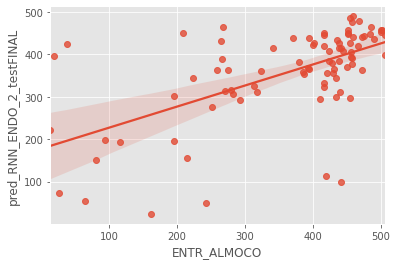

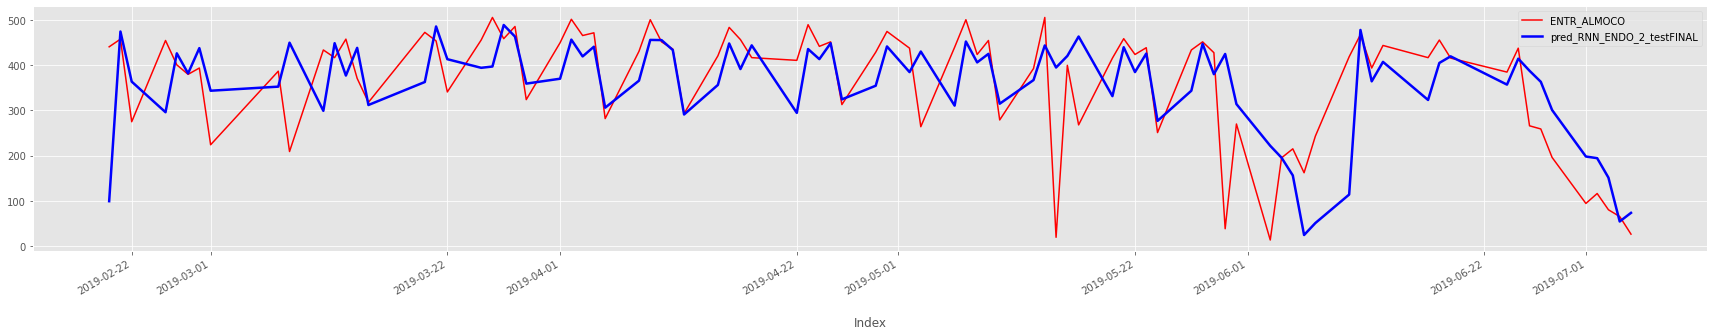

In [ ]:
#RNN_ENDO_2
model_name = 'RNN_ENDO_2'
model = RNN_ENDO_2
x_test = scaled_recurrent_test_x
pred_y = model.predict(x_test)
# retorna os valores a escala normal do problema
pred_y = recurrent_scalers[0].inverse_transform(pred_y) # 0 = ENTR_ALMOCO

_true_string = 'ENTR_ALMOCO'
_pred_string = 'pred_' + model_name + '_testFINAL'
df_test[_pred_string] = pred_y

datetime_index_begin_string = '2019-01-01'
datetime_index_end_string = '2019-07-31'

df_models_metrics = metricas_predicoes(df_test,_true_string,_pred_string,datetime_index_begin_string,datetime_index_end_string,df_models_metrics)

In [ ]:
RNN_ENDO_2.layers[0].get_weights()

[array([[-1.2745845 ,  0.50217354, -0.20231795,  0.61972594,  0.03424351,
          0.16226064, -0.36317348, -0.30333734, -1.0562097 , -0.30572727,
         -0.1919477 , -0.75428104, -0.31313878,  1.587495  , -0.28858793,
          0.48610547, -0.39271268, -0.37669665,  0.39382398, -0.73835796,
         -0.44887704, -0.31196854, -0.18076909,  0.3145501 , -0.31914234,
         -0.01789545,  0.20716973, -0.27468917, -0.76373875, -0.46691644,
         -0.46834525, -0.24819863,  0.4138915 ,  0.33768058,  0.19773336,
         -0.33276132,  0.06928576,  0.35130292,  0.09537978,  0.23581229,
          0.36308438,  0.01324982, -0.27142423,  0.13478303, -0.19389676,
          0.25593555, -0.47013643,  0.40054038],
        [-0.6299222 , -1.4740534 , -0.05932747, -0.28406602, -0.06707082,
         -1.096821  , -1.3010174 , -0.74709755, -0.95971894, -0.03142126,
         -1.1177245 , -0.5851001 , -0.6918407 ,  1.171075  ,  1.708092  ,
          0.07492495,  0.01555314, -1.0221816 ,  0.4531837 , -0

In [ ]:
df_test['2019-05-10':'2019-06-10']['ENTR_ALMOCO']

DATA
2019-05-10    279
2019-05-13    393
2019-05-14    506
2019-05-15     19
2019-05-16    400
2019-05-17    268
2019-05-20    416
2019-05-21    459
2019-05-22    424
2019-05-23    439
2019-05-24    251
2019-05-27    434
2019-05-28    452
2019-05-29    428
2019-05-30     38
2019-05-31    270
2019-06-03     13
2019-06-04    195
2019-06-05    215
2019-06-06    162
2019-06-07    243
2019-06-10    419
Name: ENTR_ALMOCO, dtype: int64

In [ ]:
df_test['2019-03-01':'2019-03-10']['ENTR_ALMOCO']

DATA
2019-03-01    224
2019-03-07    387
2019-03-08    209
Name: ENTR_ALMOCO, dtype: int64

#### MLP_ENDO_1

TOTAL DE REFEIÇÕES CONSUMIDAS = 31962 : 88 linhas
TOTAL DE REFEIÇÕES PROJETADAS = 32369.654 : 88 linhas
ERRO DE PREVISÃO = 407.654296875 1.2754342559132719 % do total consumido
CORRELAÇÃO (r): 0.5212411595055804 Pi (p) :1.9211578801789185e-07 R2 :0.271692346362722
RMSE = 128.05415989336365
ERRO TOTAL DE REFEIÇÕES SUB PROJETADAS = -4305.512283325195
ERRO TOTAL DE REFEIÇÕES SUPER PROJETADAS = 3897.856979370117
ERRO ABSOLUTO MEDIANO = 71.89505004882812
ERRO ABSOLUTO PERCENTUAL MEDIO = 92.58158195406224%


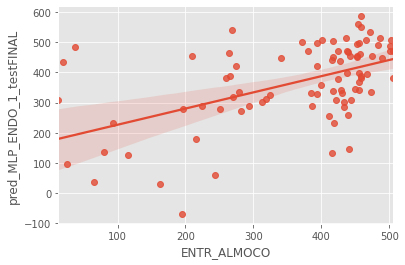

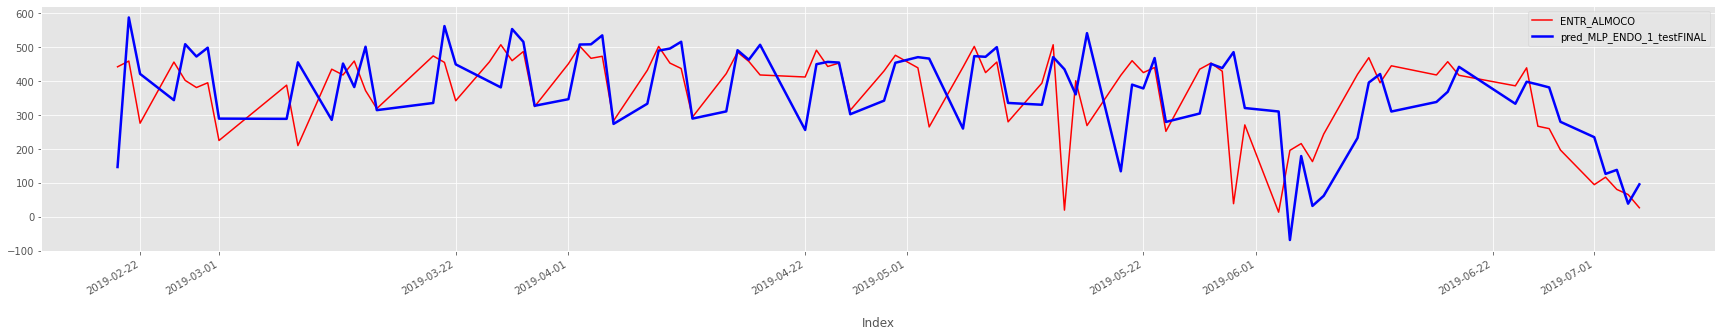

In [ ]:
model_name = 'MLP_ENDO_1'
model = MLP_ENDO_1
x_test = scaled_recurrent_test_x
pred_y = model.predict(x_test)
# retorna os valores a escala normal do problema
pred_y = recurrent_scalers[0].inverse_transform(pred_y) # 0 = ENTR_ALMOCO

_true_string = 'ENTR_ALMOCO'
_pred_string = 'pred_' + model_name + '_testFINAL'
df_test[_pred_string] = pred_y

datetime_index_begin_string = '2019-01-01'
datetime_index_end_string = '2019-07-31'

df_models_metrics = metricas_predicoes(df_test,_true_string,_pred_string,datetime_index_begin_string,datetime_index_end_string,df_models_metrics)

In [ ]:
MLP_ENDO_1.layers[1].get_weights()

[array([[-1.38481125e-01, -1.59126863e-01, -8.73689204e-02,
         -2.39390656e-01,  5.33496626e-02,  2.26480380e-01,
          1.57737777e-01,  1.87777415e-01,  1.60177380e-01,
          2.47795835e-01, -6.79058656e-02,  8.88815373e-02,
          3.17685604e-01, -8.44842046e-02, -6.41505867e-02,
          1.37901381e-01, -5.31496294e-02, -2.23153949e-01,
          4.82295118e-02,  1.37773957e-02, -4.74635251e-02,
          3.39837745e-02, -1.12744078e-01, -7.03840405e-02,
          1.67972267e-01, -2.76180267e-01,  1.50366649e-01,
          2.71348923e-01, -1.81591604e-02, -4.25054953e-02,
          1.06189959e-01, -1.98152125e-01,  7.75217637e-03,
          1.28779411e-01,  9.16294381e-02, -4.18296782e-03,
          4.35240045e-02,  7.64538348e-02, -1.39213935e-01,
         -2.36723244e-01, -8.82610157e-02, -5.86637519e-02,
          1.70157596e-01,  2.24821404e-01,  2.72037946e-02,
          1.67017236e-01, -9.63926092e-02,  2.58315802e-01,
         -1.07562300e-02, -2.58608907e-0

## IMPORTAÇÃO DOS MODELOS MISTOS (ENDÓGENOS E EXÓGENOS)

In [ ]:
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case1_RNN_EXO_1_validated.h5?raw=true
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case1_RNN_EXO_2_validated.h5?raw=true
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case1_RNN_EXO_3_validated.h5?raw=true

--2020-10-04 04:25:03--  https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case1_RNN_EXO_1_validated.h5?raw=true
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case1_RNN_EXO_1_validated.h5 [following]
--2020-10-04 04:25:04--  https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case1_RNN_EXO_1_validated.h5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case1_RNN_EXO_1_validated.h5 [following]
--2020-10-04 04:25:04--  https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case1_RNN_EXO_1_validated.h5
Resolving raw.githubusercontent.com (raw.github

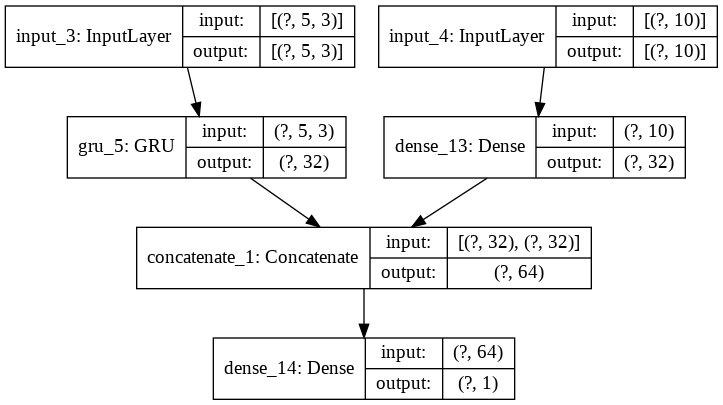

In [ ]:
RNN_EXO_1 = keras.models.Sequential()
RNN_EXO_1 = keras.models.load_model('/content/case1_RNN_EXO_1_validated.h5?raw=true')
keras.utils.plot_model(RNN_EXO_1, show_shapes=True)

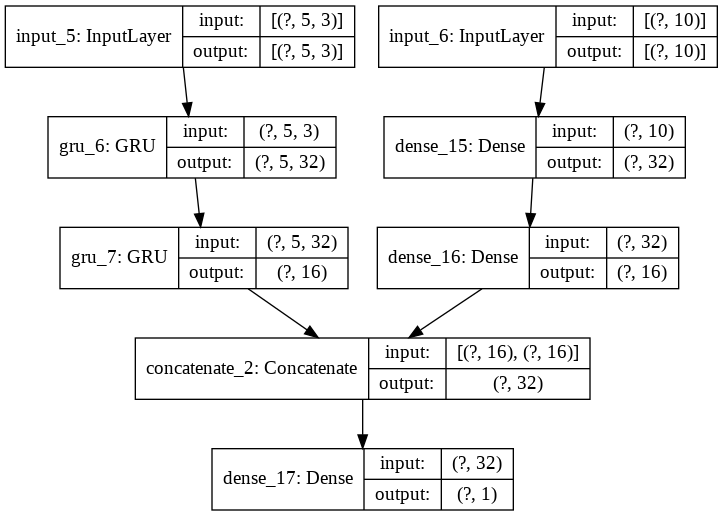

In [ ]:
RNN_EXO_2 = keras.models.Sequential()
RNN_EXO_2 = keras.models.load_model('/content/case1_RNN_EXO_2_validated.h5?raw=true')
keras.utils.plot_model(RNN_EXO_2, show_shapes=True)

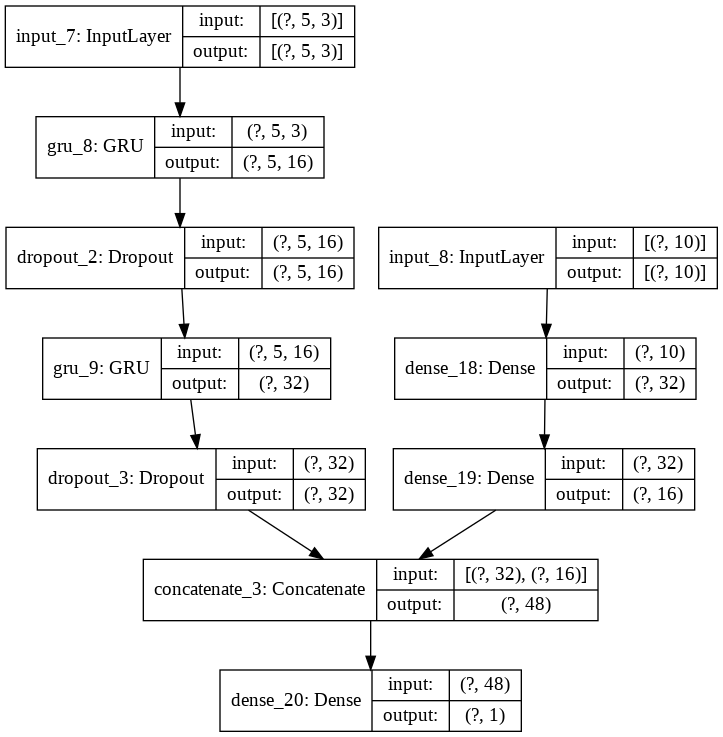

In [ ]:
RNN_EXO_3 = keras.models.Sequential()
RNN_EXO_3 = keras.models.load_model('/content/case1_RNN_EXO_3_validated.h5?raw=true')
keras.utils.plot_model(RNN_EXO_3, show_shapes=True)

### TESTES

#### RNN_EXO_1

TOTAL DE REFEIÇÕES CONSUMIDAS = 31962 : 88 linhas
TOTAL DE REFEIÇÕES PROJETADAS = 28728.816 : 88 linhas
ERRO DE PREVISÃO = -3233.18359375 -10.115711137444466 % do total consumido
CORRELAÇÃO (r): 0.4122158648305426 Pi (p) :6.590759241637016e-05 R2 :0.16992191921799218
RMSE = 124.49076120428357
ERRO TOTAL DE REFEIÇÕES SUB PROJETADAS = -2709.1732788085938
ERRO TOTAL DE REFEIÇÕES SUPER PROJETADAS = 5942.356475830078
ERRO ABSOLUTO MEDIANO = 85.59107971191406
ERRO ABSOLUTO PERCENTUAL MEDIO = 90.98694558104974%


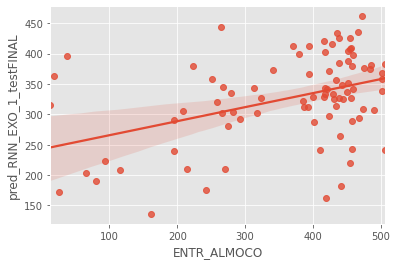

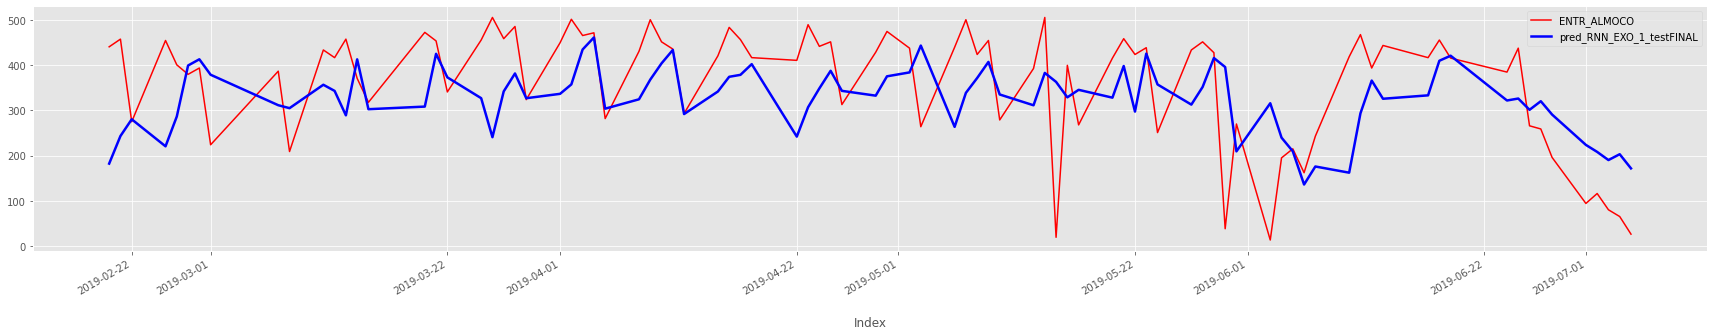

In [ ]:
#RNN_EXO_1
model_name = 'RNN_EXO_1'
model = RNN_EXO_1
x_test = (scaled_recurrent_test_x, scaled_discrete_test_x)
pred_y = model.predict(x_test)
# retorna os valores a escala normal do problema
pred_y = recurrent_scalers[0].inverse_transform(pred_y)

_true_string = 'ENTR_ALMOCO'
_pred_string = 'pred_' + model_name + '_testFINAL'
df_test[_pred_string] = pred_y

datetime_index_begin_string = '2019-01-01'
datetime_index_end_string = '2019-07-31'

df_models_metrics = metricas_predicoes(df_test,_true_string,_pred_string,datetime_index_begin_string,datetime_index_end_string,df_models_metrics)

#### **RNN_EXO_2**

TOTAL DE REFEIÇÕES CONSUMIDAS = 31962 : 88 linhas
TOTAL DE REFEIÇÕES PROJETADAS = 30823.148 : 88 linhas
ERRO DE PREVISÃO = -1138.8515625 -3.563142364370189 % do total consumido
CORRELAÇÃO (r): 0.5206433612135913 Pi (p) :1.995208420251518e-07 R2 :0.27106950957578635
RMSE = 112.99211377165491
ERRO TOTAL DE REFEIÇÕES SUB PROJETADAS = -3044.8834533691406
ERRO TOTAL DE REFEIÇÕES SUPER PROJETADAS = 4183.734128952026
ERRO ABSOLUTO MEDIANO = 63.59894561767578
ERRO ABSOLUTO PERCENTUAL MEDIO = 88.26875085831726%


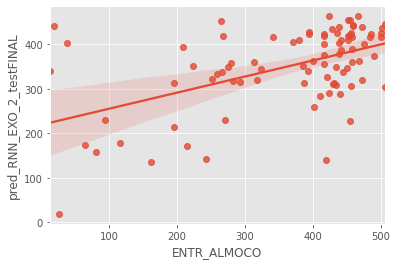

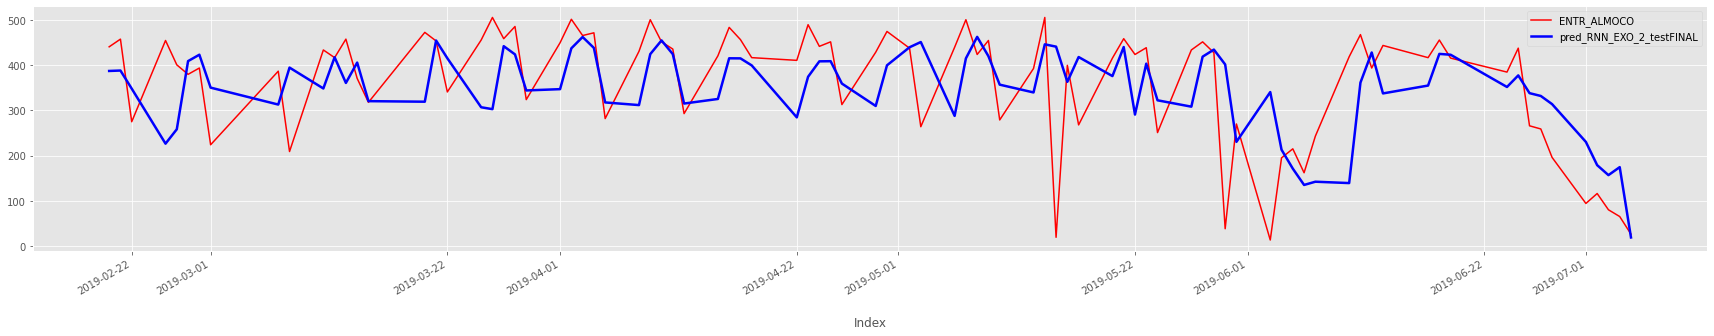

In [ ]:
#RNN_EXO_2
model_name = 'RNN_EXO_2'
model = RNN_EXO_2
x_test = (scaled_recurrent_test_x, scaled_discrete_test_x)
pred_y = model.predict(x_test)
# retorna os valores a escala normal do problema
pred_y = recurrent_scalers[0].inverse_transform(pred_y)

_true_string = 'ENTR_ALMOCO'
_pred_string = 'pred_' + model_name + '_testFINAL'
df_test[_pred_string] = pred_y

datetime_index_begin_string = '2019-01-01'
datetime_index_end_string = '2019-07-31'

df_models_metrics = metricas_predicoes(df_test,_true_string,_pred_string,datetime_index_begin_string,datetime_index_end_string,df_models_metrics)

#### RNN_EXO_3

TOTAL DE REFEIÇÕES CONSUMIDAS = 31962 : 88 linhas
TOTAL DE REFEIÇÕES PROJETADAS = 29425.791 : 88 linhas
ERRO DE PREVISÃO = -2536.208984375 -7.935075978896815 % do total consumido
CORRELAÇÃO (r): 0.33963283016931 Pi (p) :0.0012067360859947137 R2 :0.11535045932881538
RMSE = 124.65810037942255
ERRO TOTAL DE REFEIÇÕES SUB PROJETADAS = -3417.6602630615234
ERRO TOTAL DE REFEIÇÕES SUPER PROJETADAS = 5953.868759155273
ERRO ABSOLUTO MEDIANO = 100.44429016113281
ERRO ABSOLUTO PERCENTUAL MEDIO = 98.79064922123037%


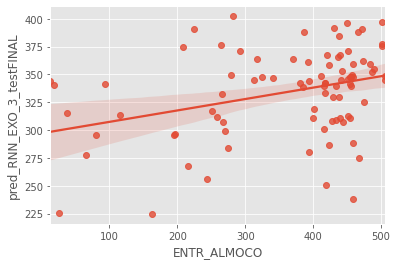

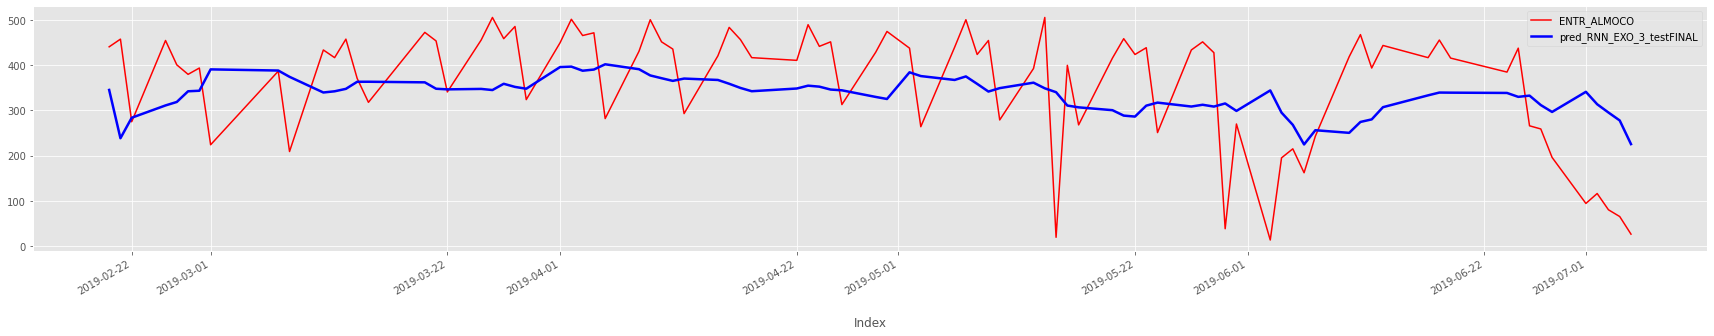

In [ ]:
#RNN_EXO_3
model_name = 'RNN_EXO_3'
model = RNN_EXO_3
x_test = (scaled_recurrent_test_x, scaled_discrete_test_x)
pred_y = model.predict(x_test)
# retorna os valores a escala normal do problema
pred_y = recurrent_scalers[0].inverse_transform(pred_y)

_true_string = 'ENTR_ALMOCO'
_pred_string = 'pred_' + model_name + '_testFINAL'
df_test[_pred_string] = pred_y

datetime_index_begin_string = '2019-01-01'
datetime_index_end_string = '2019-07-31'

df_models_metrics = metricas_predicoes(df_test,_true_string,_pred_string,datetime_index_begin_string,datetime_index_end_string,df_models_metrics)

In [ ]:
df_models_metrics.to_excel('/content/case1_df_models_metrics.xlsx')

In [ ]:
df_test

,SEMESTRE_1,SEMESTRE_2,SEGUNDA,TERCA,QUARTA,QUINTA,SEXTA,DISTANCIA_DIA_ANTERIOR,DISTANCIA_DIA_POSTERIOR,PERC_CONCLUSAO_SEM,PERC_CONCLUSAO_MES,PRESSAO_ATMOSFERICA,TEMPERATURA,UMIDADE,VENTO,VENDAS_ALMOCO,VENDAS_ALMOCO_1,VENDAS_ALMOCO_2,VENDAS_ALMOCO_3,VENDAS_ALMOCO_4,VENDAS_ALMOCO_5,ENTR_ALMOCO,ENTR_ALMOCO_1,ENTR_ALMOCO_2,ENTR_ALMOCO_3,ENTR_ALMOCO_4,ENTR_ALMOCO_5,ENTR_JANTAR,ENTR_JANTAR_1,ENTR_JANTAR_2,ENTR_JANTAR_3,ENTR_JANTAR_4,ENTR_JANTAR_5,RU_ALMOCO_PRED,RU_JANTAR_PRED,pred_RNN_ENDO_1_NEW_test,pred_RNN_ENDO_1_test,model_rnn_unique_1,pred_RNN_ENDO_2_test,pred_MLP_ENDO_1_test,pred_RNN_EXO_1_test,pred_RNN_EXO_2_test,pred_RNN_EXO_3_test,pred_RNN_ENDO_1_testFINAL,pred_RNN_ENDO_1_NEW_testFINAL,pred_RNN_ENDO_2_testFINAL,pred_MLP_ENDO_1_testFINAL,pred_RNN_EXO_1_testFINAL,pred_RNN_EXO_2_testFINAL,pred_RNN_EXO_3_testFINAL
DATA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-02-20,1,0,0,0,1,0,0,61,1,0.73,71.43,947.9,23.7,78,0.5,966,10,40,58,95,111,441,14,35,44,88,77,246,0,17,14,27,50,100,65,75.288422,85.317772,85.317772,98.984299,145.950943,182.250366,387.503998,345.411926,85.317772,75.288422,98.984299,145.950943,182.250366,387.503998,345.411926
2019-02-21,1,0,0,0,0,1,0,1,1,1.46,75.00,949.8,22.9,84,1.5,779,966,10,40,58,95,458,441,14,35,44,88,279,246,0,17,14,27,114,35,523.388794,202.882233,202.882233,474.870453,586.287476,243.321457,388.437286,238.454773,202.882233,523.388794,474.870453,586.287476,243.321457,388.437286,238.454773
2019-02-22,1,0,0,0,0,0,1,1,3,2.19,78.57,951.6,25.5,77,2.7,314,779,966,10,40,58,275,458,441,14,35,44,61,279,246,0,17,14,57,18,398.292175,289.051147,289.051147,363.845734,420.163635,280.444153,348.338806,283.864624,289.051147,398.292175,363.845734,420.163635,280.444153,348.338806,283.864624
2019-02-25,1,0,1,0,0,0,0,3,1,4.38,89.29,946.4,27.6,71,0.6,807,314,779,966,10,40,455,275,458,441,14,35,196,61,279,246,0,17,45,22,329.883972,292.395569,292.395569,296.073853,342.848694,220.567719,226.436798,311.131470,292.395569,329.883972,296.073853,342.848694,220.567719,226.436798,311.131470
2019-02-26,1,0,0,1,0,0,0,1,1,5.11,92.86,949.8,21.4,87,1.6,615,807,314,779,966,10,401,455,275,458,441,14,233,196,61,279,246,0,18,0,365.316162,328.533295,328.533295,426.545074,507.593719,286.661072,258.375458,318.834534,328.533295,365.316162,426.545074,507.593719,286.661072,258.375458,318.834534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-01,1,0,1,0,0,0,0,3,1,96.35,3.23,952.2,18.8,74,0.6,80,111,376,348,442,632,94,196,259,266,438,385,23,20,120,129,146,157,500,204,218.881180,261.537384,261.537384,197.936646,233.810928,223.693253,230.292511,341.280792,261.537384,218.881180,197.936646,233.810928,223.693253,230.292511,341.280792
2019-07-02,1,0,0,1,0,0,0,1,1,97.08,6.45,947.6,17.3,78,1.0,113,80,111,376,348,442,116,94,196,259,266,438,35,23,20,120,129,146,569,189,196.031769,224.775909,224.775909,194.300781,125.703171,208.172302,178.844284,313.745209,224.775909,196.031769,194.300781,125.703171,208.172302,178.844284,313.745209
2019-07-03,1,0,0,0,1,0,0,1,1,97.81,9.68,946.0,16.9,82,0.5,62,113,80,111,376,348,80,116,94,196,259,266,43,35,23,20,120,129,345,167,187.817642,172.214081,172.214081,151.184082,137.527145,190.134674,156.752350,295.456299,172.214081,187.817642,151.184082,137.527145,190.134674,156.752350,295.456299


# EXPORTANDO METRICAS

In [ ]:
df_models_metrics
df_models_metrics.to_excel('/content/case2_df_models_metrics.xlsx')

In [ ]:
df_test
df_test.to_excel('/content/case1_df_test.xlsx')

# Download xlsx files in /content/ folder and enjoy it =)

# PESOS

In [ ]:
from typing import List, Tuple, Union
def shape(ndarray: Union[List, float]) -> Tuple[int, ...]:
    if isinstance(ndarray, list):
        # More dimensions, so make a recursive call
        outermost_size = len(ndarray)
        row_shape = shape(ndarray[0])
        return (outermost_size, *row_shape)
    else:
        # No more dimensions, so we're done
        return ()

## MLP_ENDO_1

(6,)


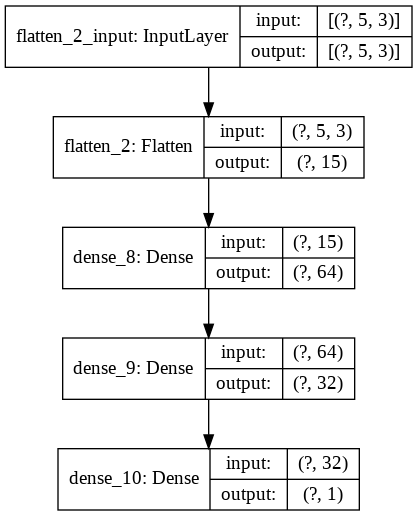

In [ ]:
MLP_ENDO_1_w = MLP_ENDO_1.get_weights()
MLP_ENDO_1_s = shape(MLP_ENDO_1_w)
print(MLP_ENDO_1_s)
keras.utils.plot_model(MLP_ENDO_1, show_shapes=True)

### ANALISE DAS CAMADAS DE PESOS:

Como o shape lista de pesos convertido para um vetor np.array retornou 6. Então as 5 primeiras dimensoes do vetor são os lags temporais de cada feature (1 dia anterior, 2 dias anteriores, 3, 4 e 5 dias anteriores).

E as features estão na seguinte ordem : ENTR_ALMOCO, VENDAS_ALMOCO, ENTR_JANTAR

In [ ]:
# CAMADA DE ENTRADA
MLP_ENDO_1_w_input = MLP_ENDO_1_w[0]
MLP_ENDO_1_w_input.shape
# ENTR_ALMOCO 1 A 5, VENDAS_ALMOCO 1 A 5, ENTR_JANTAR 1 A 5

(15, 64)

In [ ]:
# PESOS VENDAS ALMOÇO 1 dia anterior
vendas_w = MLP_ENDO_1_w_input[5]
vendas_w
print(np.sum(vendas_w))

-3.889424


In [ ]:
# PESOS VENDAS ALMOÇO 2 dia anterior
vendas_w = MLP_ENDO_1_w_input[6]
vendas_w
print(np.sum(vendas_w))

1.1300622


In [ ]:
# PESOS ENTR ALMOÇO 5 dia anterior
entr_w = MLP_ENDO_1_w_input[4]
entr_w
print(np.sum(entr_w))

-2.2105403


In [ ]:
# PESOS ENTR JANTAR 1 dia anterior
entr_w = MLP_ENDO_1_w_input[10]
entr_w
print(np.sum(entr_w))

-1.200459


In [ ]:
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case1_RNN_EXO_3_validated.h5?raw=true
df_val = pd.read_pickle("https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case1_df_val.pkl?raw=true")
#RNN_EXO_3
model_name = 'RNN_EXO_3'
model = RNN_EXO_3
x_validation = (scaled_recurrent_val_x, scaled_discrete_val_x)
pred_y = model.predict(x_validation)
# retorna os valores a escala normal do problema
pred_y = recurrent_scalers[0].inverse_transform(pred_y)
val_y_original = df_val['ENTR_ALMOCO']
# calcula erros
mse = mean_squared_error(val_y_original, pred_y)
# .. outros erros
## plota grafico

_true_string = 'ENTR_ALMOCO'
_pred_string = 'pred_' + model_name + '_testFINAL'
df_val[_pred_string] = pred_y

datetime_index_begin_string = '2018-01-01'
datetime_index_end_string = '2019-07-31'

df_models_metrics = metricas_predicoes(df_test,_true_string,_pred_string,datetime_index_begin_string,datetime_index_end_string,df_models_metrics)

--2020-10-04 04:29:48--  https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case1_RNN_EXO_3_validated.h5?raw=true
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case1_RNN_EXO_3_validated.h5 [following]
--2020-10-04 04:29:48--  https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case1_RNN_EXO_3_validated.h5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case1_RNN_EXO_3_validated.h5 [following]
--2020-10-04 04:29:49--  https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case1_RNN_EXO_3_validated.h5
Resolving raw.githubusercontent.com (raw.github

NameError: ignored